**DOWNLOAD DATABASE FROM KAGGLE AND UNZIPPING**


In [ ]:
!pip install kaggle
import os
import requests
! pip install cryptography
from cryptography.fernet import Fernet
import base64


In [ ]:
def decrypt_string(key, ciphertext):
    cipher_suite = Fernet(key)
    decrypted_data = cipher_suite.decrypt(ciphertext.encode())
    return decrypted_data.decode()



key = input("insert key:")


decoded = decrypt_string(key, "gAAAAABk9xBa3eFP92CFCJtvQdSsmokMYfU2GFVI-AqpXNjNysqOAPm4oWKq3bzknm9Iz5MxUyNta6vNJl3I_g31P20NRiZ_aOsh-FELLvSwftJIbaRMuZohi08VJPzZhqLjTGBLgx-D")

print("Access granted")
os.getcwd()
os.environ['KAGGLE_USERNAME'] = "matiassalaris"
os.environ['KAGGLE_KEY'] = decoded

#download the "ealtman2019/ibm-transactions-for-anti-money-laundering-aml" kaggle database

!kaggle datasets download --force -d ealtman2019/ibm-transactions-for-anti-money-laundering-aml

insert key:Fm4ZMvAMi137fE5amfK5sEInvt9u7RKMRcxIRIjKAvc=
a30078fdba2d0450fb1779ff727a4ac5
100% 7.42G/7.42G [01:26<00:00, 160MB/s]
100% 7.42G/7.42G [01:26<00:00, 92.2MB/s]


In [ ]:
#unzip the file 'LI-Small_Trans.csv'
import zipfile
zip_path = '/content/ibm-transactions-for-anti-money-laundering-aml.zip'
file_to_extract = 'LI-Small_Trans.csv'
output_path = '/content/extracted_dataset'

def unzip_single_file(zip_path, file_to_extract, output_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        if file_to_extract in zip_ref.namelist():
            zip_ref.extract(file_to_extract, path=output_path)
            print(f"The file '{file_to_extract}' has been extracted to '{output_path}'.")
        else:
            print(f"The file '{file_to_extract}' does not exist in the zip folder.")


unzip_single_file(zip_path, file_to_extract, output_path)

The file 'LI-Small_Trans.csv' has been extracted to '/content/extracted_dataset'.


**SET UP THE ENVIRONMENT(PYSPARK,PANDAS, Etc..)**


In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf

#Create the session
conf = SparkConf().set("spark.ui.port", "4050")

#Create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=9b69895dee9fb82b615a3164e14dec772082c545ec585f34ebe99bef4a12a631
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected packag

**ANALYSIS**

10042B660    314
10042B6A8    196
10042B6F0     48
10042BA08     39
10042B780     32
            ... 
8020047D0      1
81B572F61      1
803BFD270      1
817407180      1
814C44D60      1
Name: Account, Length: 2382, dtype: int64


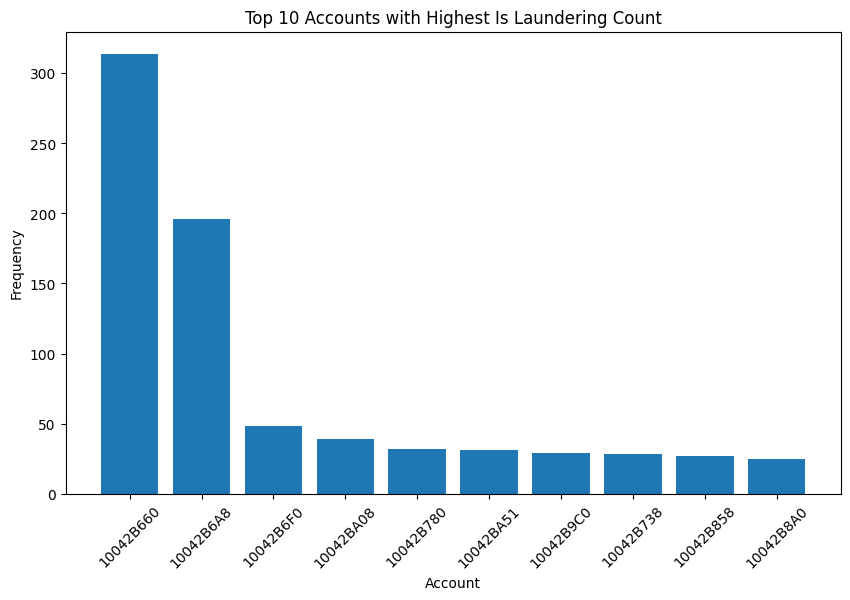

In [ ]:
import pandas as pd
import random
import numpy as np

# Load the dataset into a pandas DataFrame
dj = pd.read_csv('/content/extracted_dataset/LI-Small_Trans.csv')

#Set the display options to show all columns without wrapping
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of "Is Laundering" instances equal to 1 for each account
account_counts = dj[dj["Is Laundering"] == 1]["Account"].value_counts()

# Sort the accounts based on the count in descending order
sorted_accounts = account_counts.sort_values(ascending=False)
print(sorted_accounts)
# Select the top 10 accounts with the highest count
top_10_accounts = sorted_accounts.head(10)

# Plot a histogram of the selected accounts
plt.figure(figsize=(10, 6))
plt.bar(top_10_accounts.index, top_10_accounts.values)
plt.xlabel('Account')
plt.ylabel('Frequency')
plt.title('Top 10 Accounts with Highest Is Laundering Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#count null values in dataframe
nan_count = dj.isna().sum().sum()
print("Nan count:", nan_count)

#dataframe summary
summary = dj.describe()
print(summary)

Nan count: 0
          From Bank       To Bank  Amount Received   Amount Paid  Is Laundering
count  6.924049e+06  6.924049e+06     6.924049e+06  6.924049e+06   6.924049e+06
mean   5.938718e+04  8.441702e+04     6.324067e+06  4.676036e+06   5.148722e-04
std    9.051700e+04  9.064562e+04     2.105371e+09  1.544099e+09   2.268495e-02
min    0.000000e+00  0.000000e+00     1.000000e-06  1.000000e-06   0.000000e+00
25%    2.190000e+02  1.125500e+04     1.742100e+02  1.753800e+02   0.000000e+00
50%    1.419500e+04  2.964000e+04     1.397620e+03  1.399440e+03   0.000000e+00
75%    1.106820e+05  1.480400e+05     1.229633e+04  1.222687e+04   0.000000e+00
max    3.769670e+05  3.769670e+05     3.644854e+12  3.644854e+12   1.000000e+00


**PRE-PROCESSING**

### 1. Normalize Currency to US Dollars

In [ ]:
currency_mapping = {
    'Euro': 0.9996,
    'Bitcoin': 0.000005,
    'Australian Dollar': 1.464514,
    'Brazil Real': 5.22181,
    'Canadian Dollar': 1.316373,
    'Mexican Peso': 20.18732,
    'Ruble': 60.291,
    'Rupee': 79.587665,
    'Saudi Riyal': 7.84796,
    'Shekel': 30.49032,
    'Swiss Franc': 0.979808,
    'UK Pound': 0.864384,
    'US Dollar': 1,
    'Yen': 139.28428,
    'Yuan': 6.89894
}

# Create a function 'Convert to Dollar'
def convert_to_dollar(amount, currency):
    return amount / currency_mapping[currency]

# Apply the 'Convert to Dollar' function to create a new column 'Amount in USD'
dj['Amount in USD'] = dj.apply(lambda row: convert_to_dollar(row['Amount Paid'], row['Payment Currency']), axis=1)

# Drop the 'Amount Paid' and 'Amount Received' columns
dj.drop(['Amount Paid', 'Amount Received'], axis=1, inplace=True)

### 2. Find ant Trim Outliers

Big outliers:
123204999999.99998
71404400000.0
49893914245.399994


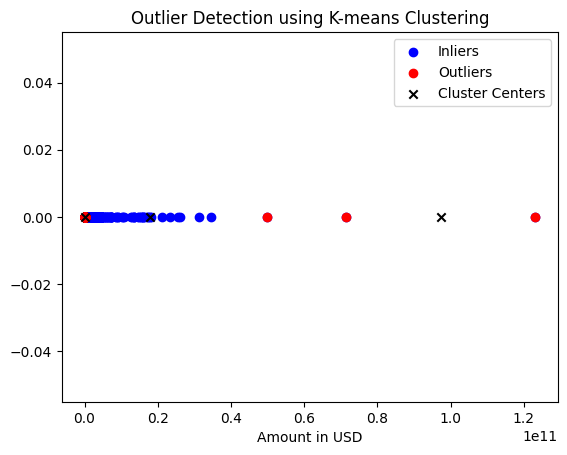

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#select the column we want to cluster
data = np.array(dj['Amount in USD'])

# Define the number of clusters
n_clusters = 3

# Fit KMeans on the dataset
kmeans = KMeans(n_clusters=n_clusters, n_init = 10)
kmeans.fit(data.reshape(-1,1))

# Predict cluster labels for each sample
labels = kmeans.predict(data.reshape(-1,1))

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

distances = kmeans.transform(data.reshape(-1,1))

# Calculate the average distance for each sample
avg_distances = np.mean(distances, axis=1)

# Set a threshold for outlier detection (you can adjust this value)
threshold = np.percentile(avg_distances, 94)  # Example: 95th percentile

# Identify outliers based on the threshold
outliers = data[avg_distances > threshold]
print("Big outliers:")
for i in outliers:
  if i>100:
    print(i)
    #delete big outlier
    dj = (dj[dj['Amount in USD'] != i])

#plot on Amount in USD attribute
plt.scatter(data, np.zeros_like(data), c='blue', label='Inliers')
plt.scatter(outliers, np.zeros_like(outliers), c='red', label='Outliers')
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='black', marker='x', label='Cluster Centers')
plt.xlabel('Amount in USD')
plt.title('Outlier Detection using K-means Clustering')
plt.legend()
plt.show()

### 3. Encoding of Attributes(One-Hot-Encoding and Frequency Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder



pandas_df = dj

#ONEHOTENCODING ON 'PAYMENT FORMAT'
one_hot_enc = OneHotEncoder()
payment_format_col = pandas_df['Payment Format']
column_data_2d = payment_format_col.values.reshape(-1, 1)
encoded_data = one_hot_enc.fit_transform(column_data_2d)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one_hot_enc.get_feature_names_out(['PF']))
encoded_df.index = pandas_df.index
pandas_updated_pf= pd.concat([pandas_df, encoded_df], axis=1)
pandas_updated_pf.drop('Payment Format', axis=1, inplace=True)

#ONEHOTENCODING ON 'PAYMENT CURRENCY'
payment_format_col = pandas_df['Payment Currency']
column_data_2d = payment_format_col.values.reshape(-1, 1)
encoded_data = one_hot_enc.fit_transform(column_data_2d)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one_hot_enc.get_feature_names_out(['PC']))
encoded_df.index = pandas_updated_pf.index
pandas_updated_pc= pd.concat([pandas_updated_pf, encoded_df], axis=1)

#Drop the useless attributes
pandas_updated_pc.drop('Payment Currency', axis=1, inplace=True)
pandas_updated_pc.drop('Receiving Currency', axis=1, inplace=True)
pandas_updated_pc.drop('Timestamp', axis=1, inplace=True)

# Move Y column to the Last
temp_cols=pandas_updated_pc.columns.tolist()
new_cols=temp_cols[0:4]+temp_cols[5:28]+ temp_cols[4:5]
df=pandas_updated_pc[new_cols]

# Print the modified DataFrame
data_with_hashed_features = df
print(df.sort_values(by = 'From Bank',ascending = False))

         From Bank    Account  To Bank  Account.1  Amount in USD  PF_ACH  PF_Bitcoin  PF_Cash  PF_Cheque  PF_Credit Card  PF_Reinvestment  PF_Wire  PC_Australian Dollar  PC_Bitcoin  PC_Brazil Real  PC_Canadian Dollar  PC_Euro  PC_Mexican Peso  PC_Ruble  PC_Rupee  PC_Saudi Riyal  PC_Shekel  PC_Swiss Franc  PC_UK Pound  PC_US Dollar  PC_Yen  PC_Yuan  Is Laundering
429087      376967  81C1EB301   376967  81C1EB301  659548.000000     0.0         1.0      0.0        0.0             0.0              0.0      0.0                   0.0         1.0             0.0                 0.0      0.0              0.0       0.0       0.0             0.0        0.0             0.0          0.0           0.0     0.0      0.0              0
6022950     376966  81B4C53C1    72146  81C1E6061    1805.800000     0.0         1.0      0.0        0.0             0.0              0.0      0.0                   0.0         1.0             0.0                 0.0      0.0              0.0       0.0       0.0        

**DECISION TREE CLASSIFIER**

### Node Class

In [ ]:
class Node():
    def __init__(self, f_indx = None, threshold = None, l = None, r = None, info_gain = None, label = None):

        # for decision node
        self.threshold = threshold
        self.f_indx = f_indx
        self.l = l
        self.r = r
        self.info_gain = info_gain

        # for leaf node
        self.label = label

### Tree Class

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2, weight_1=0.001, n_thresholds = 100,col_dictionary=None):

        # initialize the root of the tree
        self.root = None

        # stopping criteria
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

        #hyperparameters
        self.weight_1 = weight_1
        self.n_thresholds = n_thresholds

        #attribute needed for randomforest
        self.col_dictionary=col_dictionary

    def grow_tree(self, dataset, curr_depth=0):
        #Grow a tree recursively

        X, Y = dataset[:,:-1], dataset[:,-1]
        n_samples, n_features = np.shape(X)

        # split until stopping conditions are met
        if n_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            optimal_split = self.get_optimal_split(dataset, n_samples, n_features)
            # check if information gain is positive, if not we are in a pure node
            if optimal_split["info_gain"]>0:
                # recur left
                left_subtree = self.grow_tree(optimal_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.grow_tree(optimal_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(optimal_split["f_indx"], optimal_split["threshold"],
                            left_subtree, right_subtree, optimal_split["info_gain"])

        # compute leaf node
        leaf_label = self.calculate_leaf_label(Y)
        # return leaf node
        return Node(label=leaf_label)

    def get_optimal_split(self, dataset, n_samples, n_features):
        #Find the optimal split for a node

        # dictionary to store the best split
        optimal_split = {}
        optimal_split['info_gain'] = 0
        max_inf_g = -1000000


        # loop over all the features
        for f_indx in range(n_features):

            # values for each column
            feature_values = dataset[:,f_indx]
            # unique values for each column
            possible = np.unique(feature_values)
            # set of thresholds computed as the minimun between the parameter thresholds and the len of possible
            possible_thresholds = np.random.choice(possible,min(self.n_thresholds,len(possible)), replace=True)

            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split_data(dataset, f_indx, threshold)
                # check if childs are not null

                if len(dataset_left)>0 and len(dataset_right)>0:

                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.compute_info_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_inf_g:
                        optimal_split["f_indx"] = f_indx
                        optimal_split["threshold"] = threshold
                        optimal_split["dataset_left"] = dataset_left
                        optimal_split["dataset_right"] = dataset_right
                        optimal_split["info_gain"] = curr_info_gain
                        max_inf_g = curr_info_gain
                        if(self.col_dictionary != None):
                            optimal_split["f_indx"] = self.col_dictionary[f_indx]


        # return best split
        return optimal_split

    def split_data(self, dataset, f_indx, threshold):
        #Split the data based on the given threshold
        dataset_left = np.array([row for row in dataset if row[f_indx]<=threshold])
        dataset_right = np.array([row for row in dataset if row[f_indx]>threshold])
        return dataset_left, dataset_right

    def compute_info_gain(self, parent, l_child, r_child):
        #compute info gain
        w_left = len(l_child) / len(parent)
        w_right = len(r_child) / len(parent)
        gain = self.calculate_gini_index(parent) - (w_left*self.calculate_gini_index(l_child) + w_right*self.calculate_gini_index(r_child))
        return gain


    def calculate_gini_index(self, y):
        #Compute gini index

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            if cls == 0:
                p_cls = len(y[y == cls])/ len(y)
                gini += p_cls**2
            else:
                p_cls = len(y[y == cls])/ len(y)
                gini += p_cls**2

        return 1 - gini

    def calculate_leaf_label(self, Y):
        #Compute leaf node label

        Y = list(Y)
        count_0 = Y.count(0)
        count_1 = Y.count(1) * self.weight_1
        mx = 0
        if count_1 >= count_0:
            mx = 1
        return mx


    def fit(self, X, Y):
        #Train the tree

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.grow_tree(dataset)

    def predict(self, X):
        #function to predict new dataset

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        #Predict a single data point

        if tree.label!=None: return tree.label

        feature_val = x[tree.f_indx]

        if feature_val<=tree.threshold:

            return self.make_prediction(x, tree.l)

        else:
            return self.make_prediction(x, tree.r)

    def get_params(self, deep = True):
        return {
            'min_samples_split': self.min_samples_split,
            'max_depth': self.max_depth,
            'weight_1': self.weight_1,
            'n_thresholds': self.n_thresholds
        }
    def set_params(self, **params):
        for param, label in params.items():
            setattr(self, param, label)
        return self

### Sampler with Chosen Ratio

In [ ]:
#sampler class that allow us to sample the dataset forcing a specific ratio of 1s and 0s

class MySampler():
    def __init__(self, original_df):
        self.original_df = original_df

    def get_sample(self, sample_size=100, laundering_ratio=0.1):
        sample_1s = self.original_df[self.original_df['Is Laundering'] == 1].sample(int(sample_size * laundering_ratio))
        sample_0s = self.original_df[self.original_df['Is Laundering'] == 0].sample(int(sample_size * (1- laundering_ratio)))
        samp = pd.concat([sample_1s, sample_0s])

        count1 = samp[samp['Is Laundering'] == 1].shape[0]
        count0 = samp[samp['Is Laundering'] == 0].shape[0]
        print('Sample dimension:', count1 + count0, '#1:', count1, '#0:', count0)
        return samp

**SPLITTING DATA AND FREQUENCY ENCODING, FITTING AND PREDICTING THE TREE**

### Training and Test Splitting

In [ ]:
! pip install category_encoders
import category_encoders as ce
import collections, numpy

samp = MySampler(data_with_hashed_features).get_sample(500000, 0.00087)

X = samp.iloc[:,0:27]
Y = samp['Is Laundering'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41,stratify = Y)

# columns transformed with target encoding
cole = ['From Bank','Account','To Bank','Account.1']
encoder = ce.TargetEncoder(cols = cole)

X_train_encoded = encoder.fit_transform(X_train,Y_train)


X_test_encoded = encoder.transform(X_test)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00
Sample dimension: 500000 #1: 435 #0: 499565


### Fitting the Model

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=7, weight_1 = 5, n_thresholds = 10)
classifier.fit(X_train_encoded.values,Y_train)

### Test

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score,accuracy_score
import numpy

# Evaluate the model on the training set
Y_train_pred = classifier.predict(X_train_encoded.values)

# Evaluate the model on the validation set
y_pred = classifier.predict(X_test_encoded.values)

train_recall = recall_score(Y_train, Y_train_pred, average ='binary')
train_precision = precision_score(Y_train, Y_train_pred, average ='binary')

print("TRAINING:")
print('Recall: ', train_recall)
print('Precision: ', train_precision)
tn, fp, fn, tp = confusion_matrix(Y_train, Y_train_pred).ravel()
print('True negatives:', tn,'     False negatives', fn,'     True positives:',tp,  '     False positives:', fp)
#print(Y_train_pred)

print("")

# Calculate recall/precision on the test set


print("TEST:")
recall = recall_score(Y_test, y_pred, average ='binary')
precision = precision_score(Y_test, y_pred, average ='binary')
print('Recall: ', recall)
print('Precision: ', precision)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print('True negatives:', tn, '     False negatives', fn, '     True positives:',tp,'     False positives:', fp)


# Compute the accuracy score (change as per your evaluation metric)
accuracy = accuracy_score(y_pred,Y_test)
print("accuracy",accuracy)

TRAINING:
Recall:  1.0
Precision:  0.8226950354609929
True negatives: 399577      False negatives 0      True positives: 348      False positives: 75

TEST:
Recall:  0.011494252873563218
Precision:  0.03125
True negatives: 99882      False negatives 86      True positives: 1      False positives: 31
accuracy 0.99883


### Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, precision_score,f1_score
import time

param_grid = {
    'max_depth': [7,10],
    'weight_1': [5,10,100]
    }

# Create an instance of the decisiontree
model = DecisionTreeClassifier(min_samples_split=3, max_depth=10, weight_1 = 0.001, n_thresholds = 5)
# Gridsearch looks for the best hyperparameters performing cross-validation
grid_search = GridSearchCV(model, param_grid,scoring = 'precision', cv=3)
# Start time
start_time = time.time()

grid_search.fit(X_train_encoded.values,Y_train)

end_time = time.time()


# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print("Execution time:", execution_time, "seconds")


cv_results = grid_search.cv_results_

print("Best Hyperparameters:", grid_search.best_params_)

for i in range(3):
    fold_scores = cv_results['split{}_test_score'.format(i)]
    print("Fold {}: {}".format(i, fold_scores))


**RANDOM FOREST**

### Import Libraries and PySpark Dataframes

In [ ]:
import random
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col, lit
from pyspark import SparkContext
import pandas as pd
import numpy as np
spark = SparkSession.builder.master("local[10]").config("spark.driver.memory", "20g").getOrCreate()

train = np.concatenate((X_train_encoded.values, Y_train), axis=1)
test = np.concatenate((X_test_encoded.values, Y_test), axis=1)
train_DF = spark.createDataFrame(train)
test_DF = spark.createDataFrame(test)

### Random Forest

In [ ]:
class RandomForestClassifier:
    def __init__(self, label_col, min_samples_split=2, max_depth=2, weight_1=0.001, n_thresholds = 100, fraction=0.1, num_trees=10):
        self.num_trees = num_trees
        self.trees = []
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.weight_1 = weight_1
        self.n_thresholds =n_thresholds
        self.fraction = fraction

    def create_sample(self,df, label_col):
        #create a subset of the input dataset

        self.label_col = label_col
        samples = []
        # Train decision tree classifiers
        for i in range(self.num_trees):
            single_sample = []
            # ROWS BOOTSTRAP (With Replacement)
            training_sample = df.sample(withReplacement=True, fraction = self.fraction, seed=i)
            training_Y = training_sample.select(label_col)
            training_X = training_sample.drop(label_col)


            #columns BOOTSTRAP
            #choose the N of columns to not consider
            n = random.randint(1,5)
            #randomly choose which are those N column
            random_features = random.sample(training_X.columns, n)
            print('Elimino colonne:')
            print(random_features)
            #drop the chosen columns
            bootstrapped_training_X = training_X.drop(*random_features)

            #create dictionary index -> "real Index"
            #treeClassifier save the index of the attribute on which the partition is made
            #but we use pass tables with less columns
            dictionary_values = []

            #change columns name to their "real indexes": "_15" -> 14 (starting from 0)
            for column in bootstrapped_training_X.columns:
              dictionary_values.append(int(column[1:])-1)

            print(dictionary_values)
            dictionary_keys = [i for i in range(len(dictionary_values))]
            column_dictionary = dict(zip(dictionary_keys, dictionary_values))
            print(column_dictionary)


            bootstrapped_training_X = bootstrapped_training_X.toPandas().to_numpy()
            training_Y = training_Y.toPandas().to_numpy()
            single_sample.append(bootstrapped_training_X)
            single_sample.append(training_Y)
            single_sample.append(column_dictionary)
            samples.append(single_sample)

        return samples

    def create_and_fit(self,single_sample):
      #create and fit the tree

      tree = DecisionTreeClassifier(min_samples_split = self.min_samples_split, max_depth= self.max_depth, weight_1= self.weight_1,n_thresholds= self.n_thresholds, col_dictionary= single_sample[2])
      tree.fit(single_sample[0] , single_sample[1])
      # Add the trained model to the list of trees
      self.trees.append(tree)
      return tree

    def predict(self, df):
      #Make predictions on the input DataFrame using each tree

      test_X = df.drop(self.label_col)

      # Make predictions on the input DataFrame using each tree
      predictions = []
      test_X = test_X.toPandas().to_numpy()

      for tree in self.trees:

        tree_predictions = tree.predict(test_X)
        predictions.append(tree_predictions)

      # Aggregate the predictions of individual trees by majority voting
      aggregated_predictions = self.unify_predictions(predictions)
      return aggregated_predictions




    def unify_predictions(self, binary_lists):
      unified_list = []
      num_lists = len(binary_lists)
      list_length = len(binary_lists[0])
      for col in range(list_length):
          count_1 = 0
          count_0 = 0

          for row in range(num_lists):
              if binary_lists[row][col] == 1:
                  count_1 += (2/3) * self.num_trees
              else:
                  count_0 += 1

          majority_value = 1 if count_1 > count_0 else 0
          unified_list.append(majority_value)

      return unified_list

    def get_params(self, deep = True):
        return {
            'label_col': self.label_col,
            'num_trees': self.num_trees,
            'trees': self.trees,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'weight_1': self.weight_1,
            'n_thresholds': self.n_thresholds,
            'fraction': self.fraction
        }
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


### Fit and Predict the Model

In [ ]:
random_forest = RandomForestClassifier(label_col="_28", min_samples_split=2, max_depth=7, weight_1=100, n_thresholds = 10, fraction=0.05 , num_trees=5)

sample = random_forest.create_sample(train_DF, label_col="_28")

rdd = spark.sparkContext.parallelize(sample)

tr = rdd.map(lambda x: random_forest.create_and_fit(x)).collect()

random_forest.trees = tr

training_predictions = random_forest.predict(train_DF)

test_predictions = random_forest.predict(test_DF)

### Test

In [ ]:
from sklearn.metrics import accuracy_score

#training error
X_training_DF = train_DF.drop("_28")
X_training_DF = X_training_DF.toPandas().to_numpy()
Y_training_DF = train_DF.select("_28")
Y_training_DF = Y_training_DF.toPandas().to_numpy()
acc = accuracy_score(Y_training_DF, training_predictions)
training_error = 1 - accuracy_score(Y_training_DF, training_predictions)
print("Accuracy_training: ", acc)
print("Training_error: ",training_error)

#test error
Y_test_DF = test_DF.select("_28")
Y_test_DF = Y_test_DF.toPandas().to_numpy()
test_error = 1 - accuracy_score(Y_test_DF, test_predictions)
ac = accuracy_score(Y_test_DF, test_predictions)
print("Accuracy_test: ", ac)
print("Test_error: ",test_error)

Accuracy_training:  0.9997375
Training_error:  0.00026250000000005436
Accuracy_test:  0.98957
Test_error:  0.01043000000000005


In [ ]:
from sklearn.metrics import recall_score, confusion_matrix,precision_score

#training error
X_training_DF = train_DF.drop("_28")
X_training_DF = X_training_DF.toPandas().to_numpy()
Y_training_DF = train_DF.select("_28")
Y_training_DF = Y_training_DF.toPandas().to_numpy()

# Calculate recall/sensitivity on the training set
train_recall = recall_score(Y_training_DF, training_predictions, average ='binary')
train_precision = precision_score(Y_training_DF, training_predictions, average ='binary')

print("TRAINING:")
print('Recall: ', train_recall)
print('Precision: ', train_precision)
tn, fp, fn, tp = confusion_matrix(Y_training_DF, training_predictions).ravel()
print('True negatives:', tn,'     False negatives', fn,'     True positives:',tp,  '     False positives:', fp)


print("")

# Calculate recall/sensitivity on the test set
print("TEST:")
recall = recall_score(Y_test_DF, test_predictions, average ='binary')
precision = precision_score(Y_test_DF, test_predictions, average ='binary')
print('Recall: ', recall)
print('Precision: ', precision)

tn, fp, fn, tp = confusion_matrix(Y_test_DF, test_predictions).ravel()
print('True negatives:', tn, '     False negatives', fn, '     True positives:',tp,'     False positives:', fp)

NameError: ignored